<a href="https://colab.research.google.com/github/ludoveltz/test_github_fev25/blob/main/Mini_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


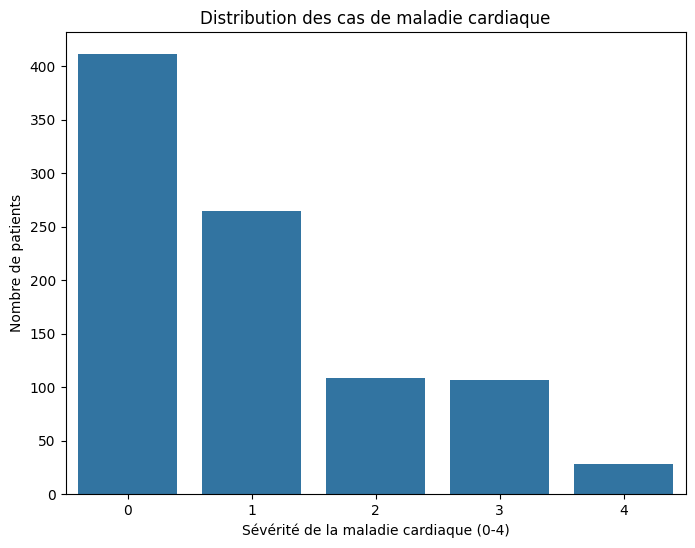

<ipython-input-5-ec76a30a576f>:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


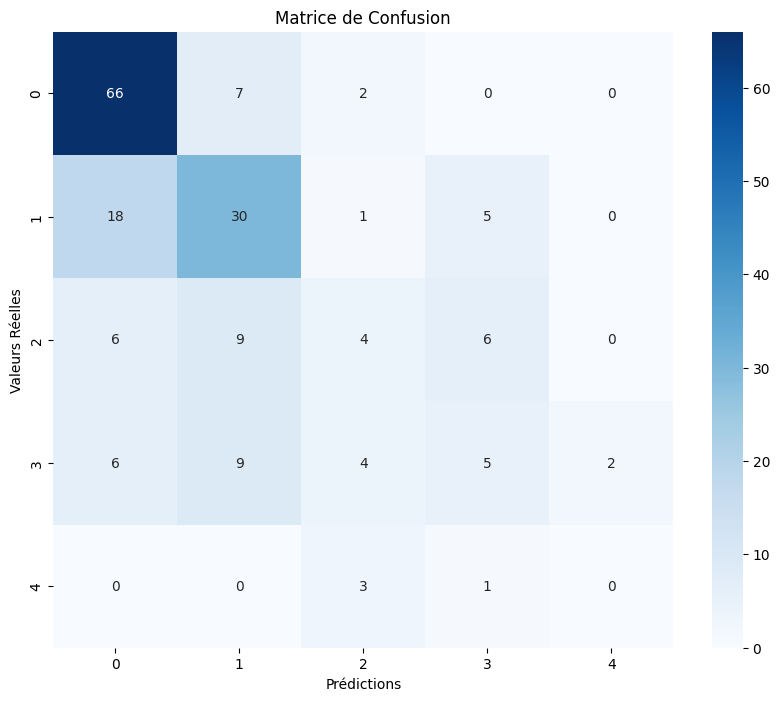


Rapport de Classification :
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        75
           1       0.55      0.56      0.55        54
           2       0.29      0.16      0.21        25
           3       0.29      0.19      0.23        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.36      0.36      0.35       184
weighted avg       0.52      0.57      0.54       184



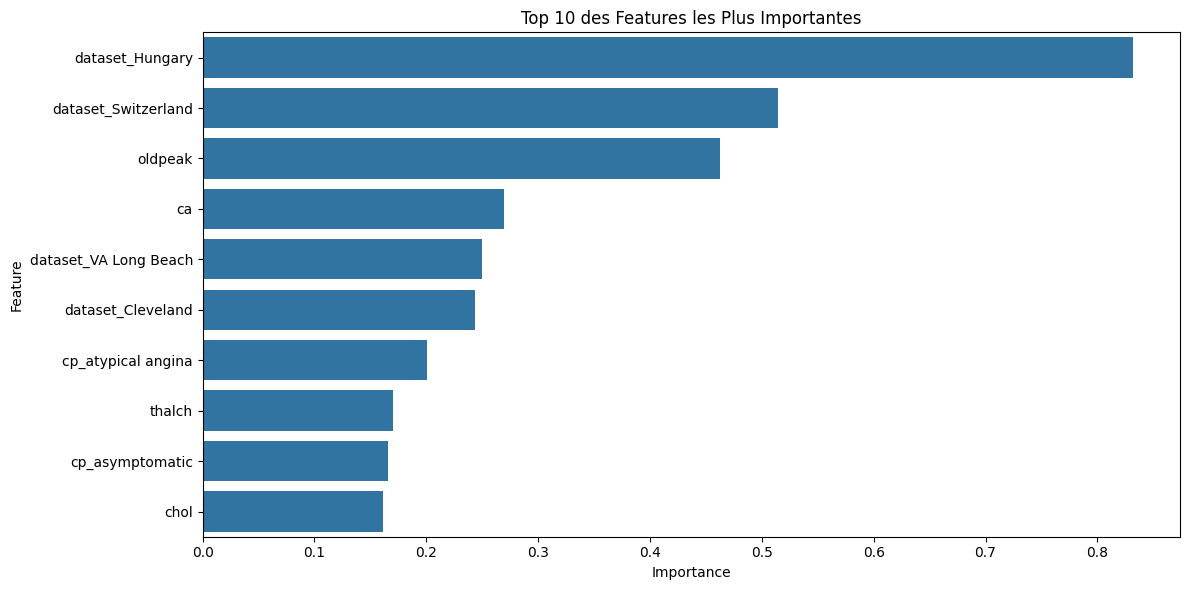

In [5]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chargement et exploration des données
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

# 1. Analyse exploratoire des données (EDA)
# Distribution de la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='num')
plt.title('Distribution des cas de maladie cardiaque')
plt.xlabel('Sévérité de la maladie cardiaque (0-4)')
plt.ylabel('Nombre de patients')
plt.show()

# 2. Prétraitement des données
# Créer une copie du DataFrame
df_clean = df.copy()

# Remplir les valeurs manquantes pour les variables numériques
numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Remplir les valeurs manquantes pour les variables catégorielles
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Encodage des variables catégorielles
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)

# Suite du code reste identique...
X = df_encoded.drop(['id', 'num'], axis=1)
y = df_encoded['num']


# Séparation des features et de la variable cible
X = df_encoded.drop(['id', 'num'], axis=1)
y = df_encoded['num']

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Entraînement du modèle
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train_scaled, y_train)

# 4. Évaluation du modèle
y_pred = model.predict(X_test_scaled)

# Matrice de confusion
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Valeurs Réelles')
plt.xlabel('Prédictions')
plt.show()

# Rapport de classification
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred))

# Importance des features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(abs(model.coef_), axis=0)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 des Features les Plus Importantes')
plt.tight_layout()
plt.show()
